<div align="center" style="color:CornSilk; background-color:#2e2e2e; padding:20px; border-radius:10px;">

# Redes Neuronales y Aprendizaje Profundo

### Master Universitario en Inteligencia Artificial

**Universidad Internacional de la Rioja (UNIR)**  
**Profesor:** Pablo Negre

---

</div>

In [16]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [17]:
# === Cargar dataset (Fashion-MNIST) ===
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# --- Explicación de cada variable ---

# x_train: contiene las imágenes de entrenamiento
# Forma: (60000, 28, 28)
# - 60000 imágenes de entrenamiento
# - Cada imagen es de 28x28 píxeles
# - Tipo de dato: uint8 (valores entre 0 y 255)
print("x_train shape:", x_train.shape)
print("x_train type:", x_train.dtype)
print("x_train min/max:", x_train.min(), x_train.max())

# y_train: contiene las etiquetas de entrenamiento
# Forma: (60000,)
# - Cada elemento es un entero de 0 a 9 que indica la clase de la imagen
# - 0=T-shirt/top, 1=Trouser, 2=Pullover, 3=Dress, 4=Coat,
#   5=Sandal, 6=Shirt, 7=Sneaker, 8=Bag, 9=Ankle boot
print("y_train shape:", y_train.shape)
print("y_train type:", y_train.dtype)
print("y_train sample:", y_train[:10])

# x_test: contiene las imágenes de prueba
# Forma: (10000, 28, 28)
# - 10000 imágenes de prueba
# - Cada imagen también es de 28x28 píxeles
print("x_test shape:", x_test.shape)

# y_test: contiene las etiquetas de prueba
# Forma: (10000,)
# - Etiquetas correspondientes a x_test
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
x_train type: uint8
x_train min/max: 0 255
y_train shape: (60000,)
y_train type: uint8
y_train sample: [9 0 0 3 0 2 7 2 5 5]
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


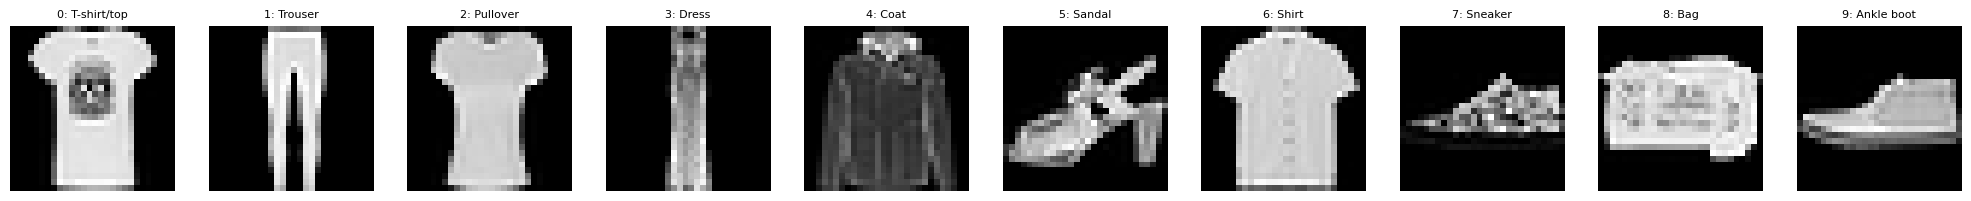

In [18]:
# Nombres de las clases (las conocemos de antemano buscando la información
# del dataset)
clases = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Crear figura
fig, axes = plt.subplots(1, 10, figsize=(20, 2))

# Para cada clase, seleccionar una imagen aleatoria y mostrarla
for i, ax in enumerate(axes):
    indices = np.where(y_train == i)[0]       # todos los índices de la clase i
    idx = np.random.choice(indices)           # seleccionar uno aleatoriamente
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f"{i}: {clases[i]}", fontsize=8)  # mostrar número y nombre
    ax.axis('off')

plt.tight_layout()
plt.show()

Número de elementos por clase: [np.int64(6000), np.int64(6000), np.int64(6000), np.int64(6000), np.int64(6000), np.int64(6000), np.int64(6000), np.int64(6000), np.int64(6000), np.int64(6000)]


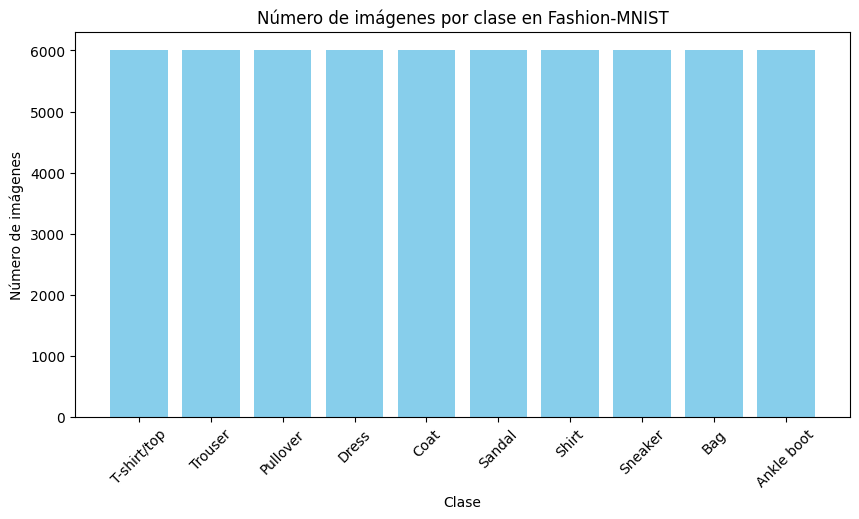

In [19]:
# Conocer si las clases del dataset están balanceadas
# (deben estarlo para un buen entrenamiento)

# Nombres de las clases
clases = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Contar cuántos elementos hay de cada clase
conteo_clases = [np.sum(y_train == i) for i in range(10)]
print("Número de elementos por clase:", conteo_clases)

# Graficar
plt.figure(figsize=(10,5))
plt.bar(clases, conteo_clases, color='skyblue')
plt.xlabel("Clase")
plt.ylabel("Número de imágenes")
plt.title("Número de imágenes por clase en Fashion-MNIST")
plt.xticks(rotation=45)
plt.show()

In [20]:
# === Normalizar imágenes ===
# Las imágenes originales tienen valores de píxel entre 0 y 255 (tipo uint8)
# Normalizamos dividiendo entre 255.0 para que los valores estén entre 0 y 1
# Esto ayuda a que la red neuronal aprenda más rápido y de manera estable
x_train = x_train / 255.0
x_test = x_test / 255.0

# Comprobamos que los valores estén correctamente normalizados
# Deben estar en el rango [0, 1]
print("Valores mínimo y máximo de x_train:", x_train.min(), x_train.max())

# Mostramos la primera imagen normalizada como una matriz de píxeles
# Cada elemento ahora es un decimal entre 0 y 1
print("Primer ejemplo (matriz de píxeles normalizados):\n", x_train[0])

Valores mínimo y máximo de x_train: 0.0 1.0
Primer ejemplo (matriz de píxeles normalizados):
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.        

In [21]:
from tensorflow.keras.utils import to_categorical

# === One-hot encoding de etiquetas ===

# Antes de convertir, y_train contiene los números de clase directamente (0 a 9)
print("ANTES DE ONE HOT: ", y_train[0:5])
# Ejemplo de salida: [9 0 0 3 0] -> cada número indica la clase de la imagen

# Convertimos las etiquetas a formato "one-hot"
# to_categorical(y, num_classes) transforma cada entero en un vector de ceros con un 1
# en la posición correspondiente a la clase
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Comprobamos la forma después de la conversión
print("Forma de y_train:", y_train.shape)
# Ahora y_train tiene forma (60000, 10), es decir, 60000 etiquetas, cada una representada por un vector de 10 elementos

# Mostramos las primeras 5 etiquetas en formato one-hot
print("Primeras 5 etiquetas one-hot:\n", y_train[:5])
# Ejemplo de salida:
# [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
#  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
#  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
#  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
#  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

# Para ver qué clase original representa cada vector one-hot
print("Clases originales de las primeras 5 etiquetas:", [y.argmax() for y in y_train[:5]])
# y.argmax() devuelve la posición del 1 en cada vector one-hot, que es la clase original


ANTES DE ONE HOT:  [9 0 0 3 0]
Forma de y_train: (60000, 10)
Primeras 5 etiquetas one-hot:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Clases originales de las primeras 5 etiquetas: [np.int64(9), np.int64(0), np.int64(0), np.int64(3), np.int64(0)]


In [22]:
# === Explicación del modelo de capas densas ===
# Queremos construir una red neuronal completamente conectada (fully connected)
# que tome imágenes 28x28 de Fashion-MNIST y clasifique en 10 clases.

# Flatten:
# Convierte la imagen 2D (28x28 píxeles) en un vector 1D de 784 elementos.
# Necesario porque las capas Dense esperan vectores 1D como entrada.

# Capas Dense ocultas:
# - Primera capa: 256 neuronas, activación ReLU
# - Segunda capa: 128 neuronas, activación ReLU
# Cada neurona aprende combinaciones ponderadas de las entradas.
# ReLU activa solo valores positivos, permitiendo que la red aprenda relaciones no lineales.

# Capa de salida:
# - 10 neuronas (una por cada clase)
# - Activación softmax: convierte las salidas en probabilidades que suman 1

# Compilación del modelo:
# - Optimizer "adam": ajusta automáticamente los pesos durante el entrenamiento
# - Loss "categorical_crossentropy": mide el error para clasificación multiclase con etiquetas one-hot
# - Métrica "accuracy": porcentaje de predicciones correctas

# === Creación del modelo ===
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# === Compilación del modelo ===
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# === Entrenamiento del modelo ===
# model.fit() ajusta los pesos de la red neuronal usando los datos de entrenamiento

history = model.fit(
    x_train, y_train,               # Datos de entrenamiento: imágenes y etiquetas (one-hot)
    validation_data=(x_test, y_test),  # Datos de validación: se usan para evaluar la red después de cada época
    epochs=10,                      # Número de pasadas completas por todo el dataset
    batch_size=32,                  # Número de muestras que la red procesa antes de actualizar los pesos
    verbose=1                        # Muestra información del entrenamiento: pérdidas y precisión por época
)

# --- Explicación adicional ---

# Datos de entrenamiento (x_train, y_train):
# La red ajusta sus pesos para minimizar la función de pérdida usando estos datos.

# Datos de validación (x_test, y_test):
# Permite ver cómo de bien generaliza el modelo a datos que no ha visto durante el entrenamiento.

# Epochs:
# Cada epoch significa que todos los ejemplos de entrenamiento han sido utilizados una vez para actualizar los pesos.

# batch_size:
# En vez de actualizar los pesos tras cada imagen, se hace tras procesar un "lote" de imágenes.
# Esto ayuda a que el entrenamiento sea más estable y rápido.

# verbose:
# Controla la información que se imprime durante el entrenamiento:
#   0 = nada, 1 = barra de progreso, 2 = línea por época


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7873 - loss: 0.5953 - val_accuracy: 0.8555 - val_loss: 0.4104
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8651 - loss: 0.3643 - val_accuracy: 0.8605 - val_loss: 0.3796
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8796 - loss: 0.3247 - val_accuracy: 0.8668 - val_loss: 0.3673
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8872 - loss: 0.3062 - val_accuracy: 0.8696 - val_loss: 0.3562
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8935 - loss: 0.2831 - val_accuracy: 0.8689 - val_loss: 0.3678
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8997 - loss: 0.2646 - val_accuracy: 0.8799 - val_loss: 0.3422
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9043 - loss: 0.2539 - val_accuracy: 0.8828 - val_loss: 0.3402
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9089 - loss: 0.

Exactitud en test: 0.8856


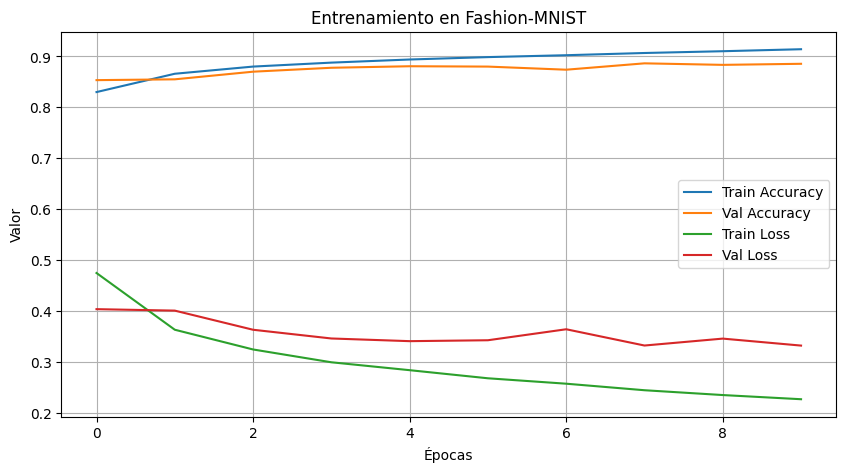

In [7]:
# === Evaluación en test ===
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Exactitud en test: {test_acc:.4f}")

# === Gráfica conjunta de Accuracy y Loss ===
plt.figure(figsize=(10,5))

# Accuracy
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")

# Loss
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")

plt.title("Entrenamiento en Fashion-MNIST")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8908 - loss: 0.3276
Pérdida en test: 0.3230
Exactitud en test: 0.8922
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


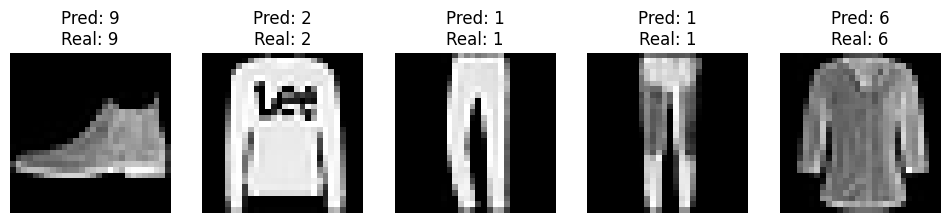

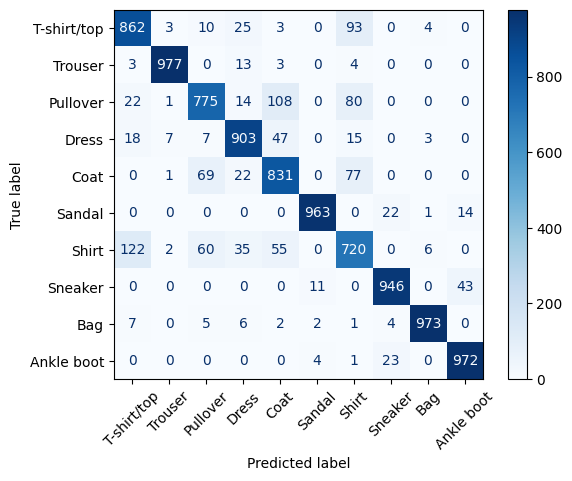

In [24]:
# === Evaluar el modelo en el conjunto de prueba (test) ===
# model.evaluate devuelve la pérdida y la métrica(s) definida(s) en model.compile
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Pérdida en test: {loss:.4f}")
print(f"Exactitud en test: {accuracy:.4f}")

# === Realizar predicciones sobre el conjunto de prueba ===
# model.predict devuelve las probabilidades predichas para cada clase
y_pred_probs = model.predict(x_test)  # forma (10000, 10)
# Convertimos las probabilidades a la clase con mayor valor (argmax)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)  # Convertimos one-hot de vuelta a enteros

# === Mostrar resultados de ejemplo ===
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(5):  # mostrar las primeras 5 imágenes de prueba
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nReal: {y_true[i]}")
    plt.axis('off')
plt.show()

# === Matriz de confusión (opcional) ===
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])
disp.plot(cmap='Blues', xticks_rotation=45)
